In [42]:
import pandas as pd
import numpy as np

In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family="Apple SD Gothic Neo")
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)



## 시단위 추출

In [44]:
region = pd.read_csv('data/0. 지역별연령분포_시단위.csv',encoding = 'CP949')
region

,행정구역,총인구수,60~69세,70~79세,80~89세,90~99세,100세 이상
0,서울특별시 (1100000000),"9,500,480","1,291,867","703,130","305,966","42,439","1,709"
1,부산광역시 (2600000000),"3,340,214","550,633","301,763","127,647","15,849",424
2,대구광역시 (2700000000),"2,378,573","344,346","180,239","85,195","10,463",262
3,인천광역시 (2800000000),"2,953,260","406,279","182,505","85,361","13,183",429
4,광주광역시 (2900000000),"1,436,916","173,183","94,924","44,017","6,154",180
5,대전광역시 (3000000000),"1,449,360","192,839","93,333","44,658","6,323",179
6,울산광역시 (3100000000),"1,117,204","158,060","64,484","24,914","3,336",64
7,세종특별자치시 (3600000000),"378,196","34,347","15,128","7,778","1,331",32
8,경기도 (4100000000),"13,577,808","1,699,088","785,597","385,907","56,711","1,837"
9,강원도 (4200000000),"1,539,038","263,043","134,783","78,574","11,815",349


In [45]:
## 인구수에 있는 콤마(,) 삭제

region['총인구수']=region['총인구수'].str.replace(',','')
region['60~69세']=region['60~69세'].str.replace(',','')
region['70~79세']=region['70~79세'].str.replace(',','')
region['80~89세']=region['80~89세'].str.replace(',','')
region['90~99세']=region['90~99세'].str.replace(',','')
region['100세 이상']=region['100세 이상'].str.replace(',','')

In [46]:
## object -> int 형으로 변환

region = region.astype({'총인구수':'int', '60~69세':'int', '70~79세':'int', '80~89세':'int', '90~99세':'int', '100세 이상':'int'})

In [47]:
region['60세 이상 인구수'] = region['60~69세'] + region['70~79세'] + region['80~89세'] + region['90~99세'] + region['100세 이상']

In [48]:
region.head()

,행정구역,총인구수,60~69세,70~79세,80~89세,90~99세,100세 이상,60세 이상 인구수
0,서울특별시 (1100000000),9500480,1291867,703130,305966,42439,1709,2345111
1,부산광역시 (2600000000),3340214,550633,301763,127647,15849,424,996316
2,대구광역시 (2700000000),2378573,344346,180239,85195,10463,262,620505
3,인천광역시 (2800000000),2953260,406279,182505,85361,13183,429,687757
4,광주광역시 (2900000000),1436916,173183,94924,44017,6154,180,318458


In [8]:
region

,행정구역,총인구수,60~69세,70~79세,80~89세,90~99세,100세 이상,60세 이상 인구수
0,서울특별시 (1100000000),9500480,1291867,703130,305966,42439,1709,2345111
1,부산광역시 (2600000000),3340214,550633,301763,127647,15849,424,996316
2,대구광역시 (2700000000),2378573,344346,180239,85195,10463,262,620505
3,인천광역시 (2800000000),2953260,406279,182505,85361,13183,429,687757
4,광주광역시 (2900000000),1436916,173183,94924,44017,6154,180,318458
5,대전광역시 (3000000000),1449360,192839,93333,44658,6323,179,337332
6,울산광역시 (3100000000),1117204,158060,64484,24914,3336,64,250858
7,세종특별자치시 (3600000000),378196,34347,15128,7778,1331,32,58616
8,경기도 (4100000000),13577808,1699088,785597,385907,56711,1837,2929140
9,강원도 (4200000000),1539038,263043,134783,78574,11815,349,488564


In [49]:
## 시도별 데이터프레임

region1 = pd.DataFrame()

In [10]:
region1.insert(0,"행정구역",region['행정구역'].str.split(' ').str[0])

In [11]:
region1.insert(1,"60세 이상 인구 비율", (region['60세 이상 인구수']/region['총인구수'])*100)

In [12]:
a = region1.sort_values("60세 이상 인구 비율",ascending=False)

In [35]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 13 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   행정구역          17 non-null     object 
 1   60세 이상 인구 비율  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 408.0+ bytes


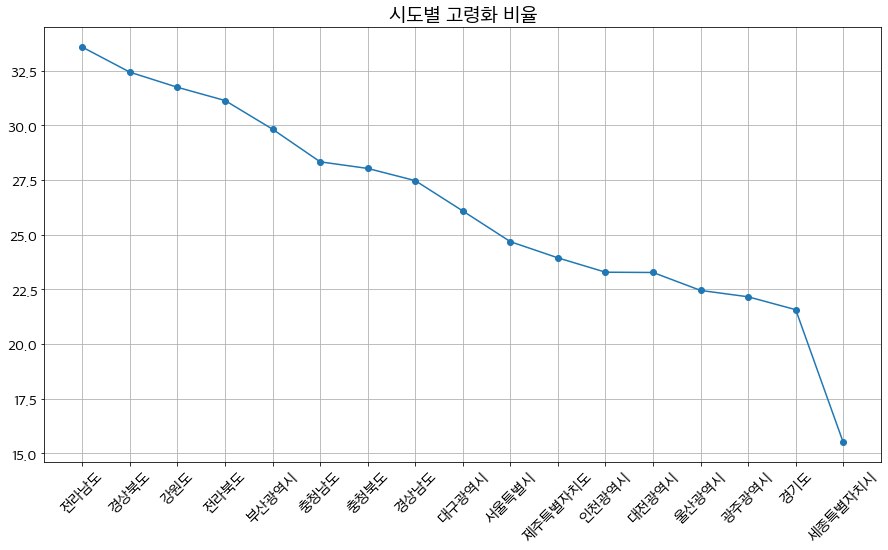

In [41]:
#시도별 고령화 비율
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(a['행정구역'],a['60세 이상 인구 비율'],marker='o')
plt.grid(True)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("시도별 고령화 비율",size=20);